In [72]:
#importing necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score,roc_auc_score,roc_curve
from patsy import dmatrices,dmatrix

In [2]:
dta=sm.datasets.fair.load_pandas().data

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
dta['affair']=(dta.affairs>0).astype(int)

In [6]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [18]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [9]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [10]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [14]:
X=X.rename(columns={'C(occupation)[T.2.0]':'occu_2',
                     'C(occupation)[T.3.0]':'occu_3',
                     'C(occupation)[T.4.0]':'occu_4',
                      'C(occupation)[T.5.0]':'occu_5',
                       'C(occupation)[T.6.0]':'occu_6',
                       'C(occupation_husb)[T.2.0]':'occu_husb_2',
                        'C(occupation_husb)[T.3.0]':'occu_husb_3',
                         'C(occupation_husb)[T.4.0]':'occu_husb_4',
                        'C(occupation_husb)[T.5.0]':'occu_husb_5',
                        'C(occupation_husb)[T.6.0]':'ocu_husb_6'})

In [21]:
X.drop('Intercept',axis=1,inplace=True)

In [22]:
X.head()

,occu_2,occu_3,occu_4,occu_5,occu_6,occu_husb_2,occu_husb_3,occu_husb_4,occu_husb_5,ocu_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [17]:
y=np.ravel(y)

occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

In [23]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [27]:
import seaborn as sns

C:\Users\ADMIN\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


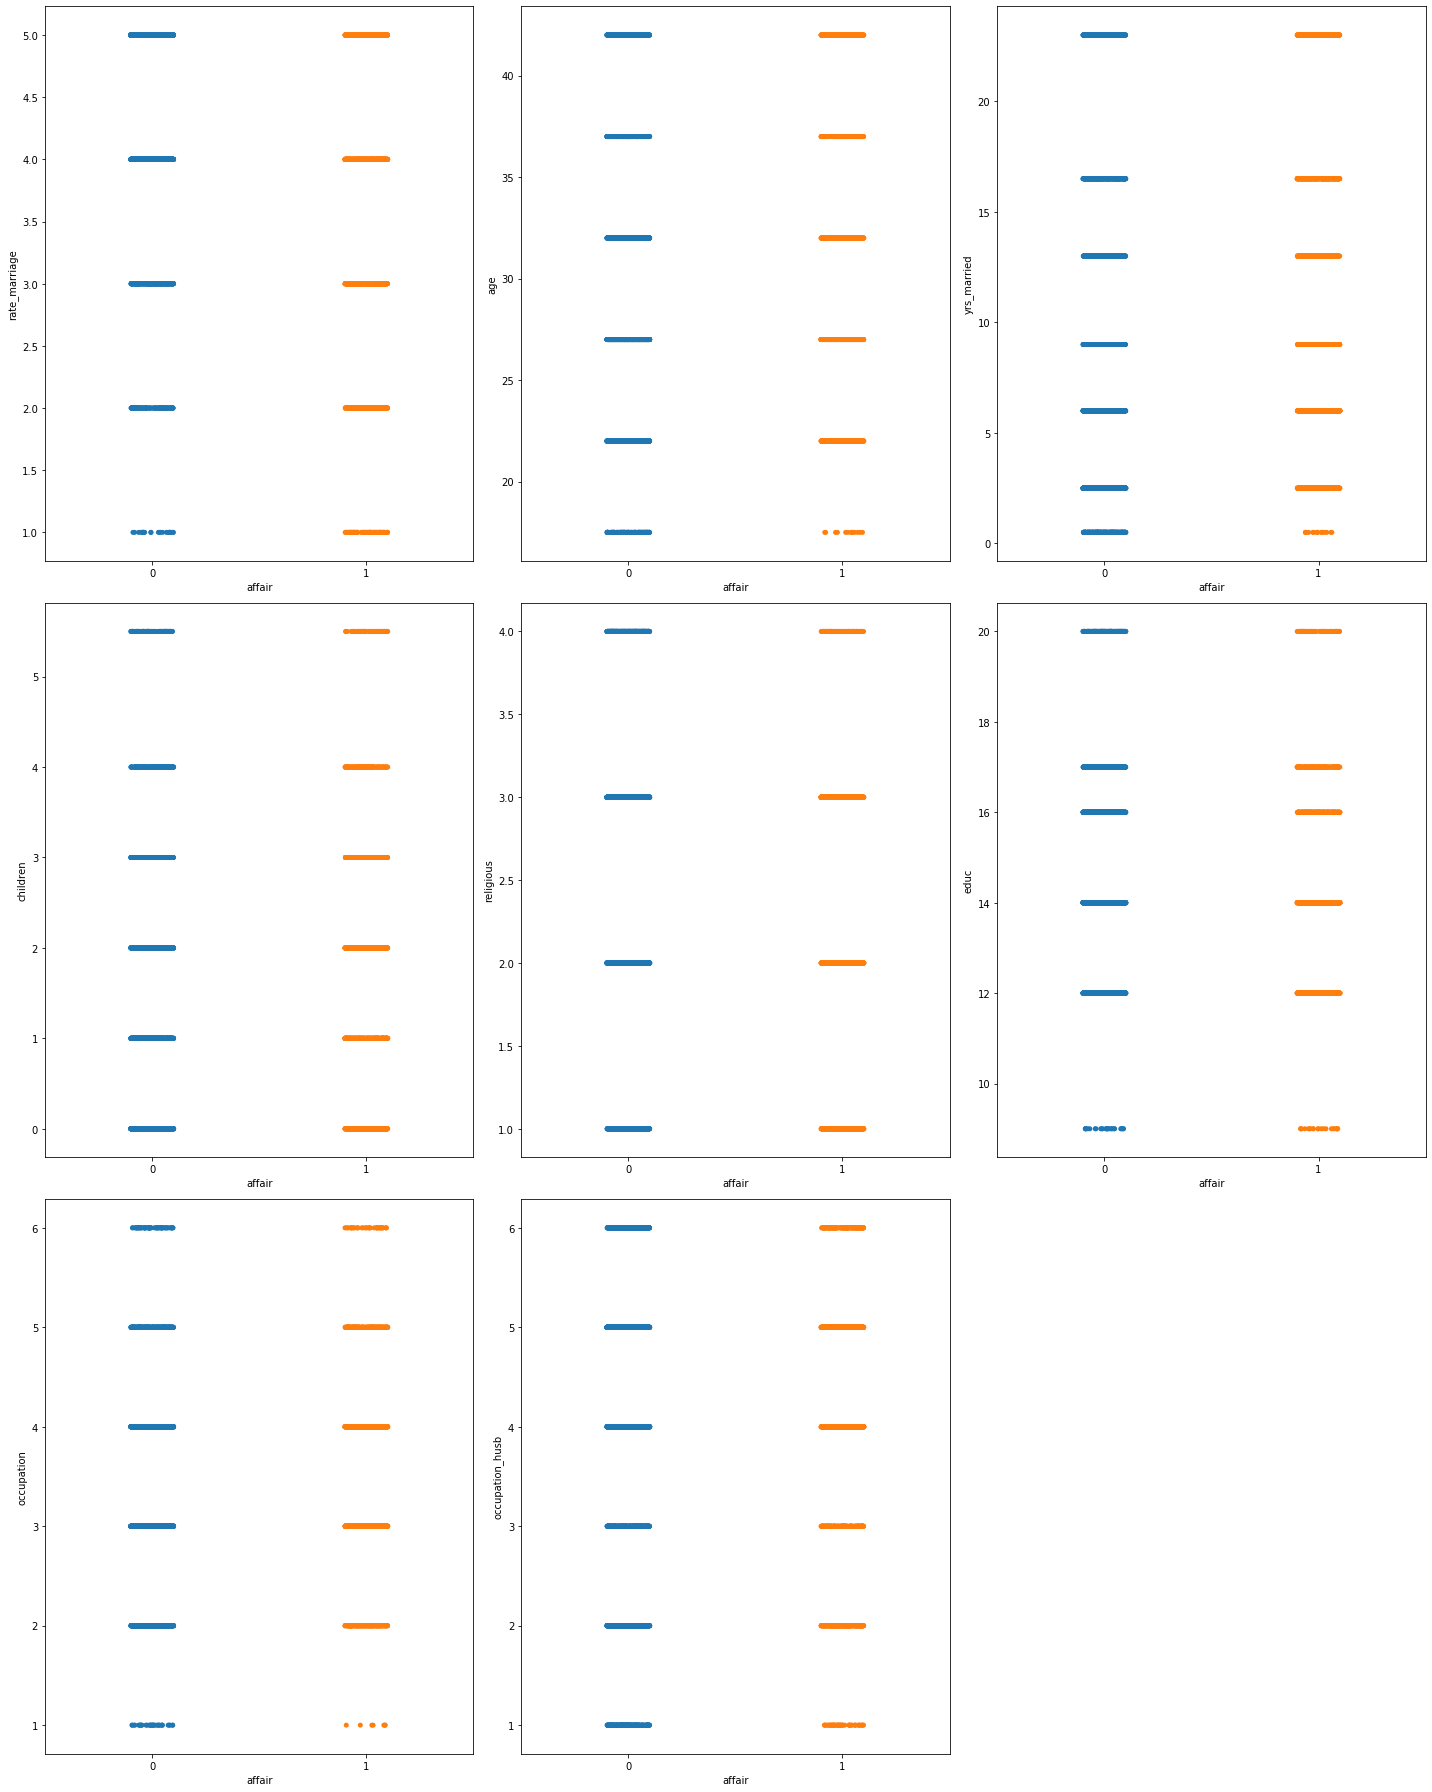

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.drop(['affair','affairs'],axis=1):
    if plotnumber<=8 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(dta.affair,dta[column])
    plotnumber+=1
plt.tight_layout()

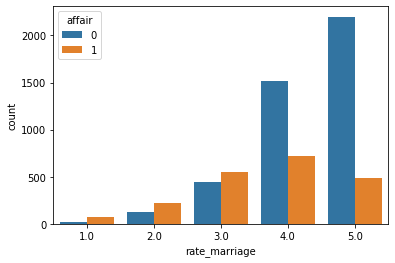

In [36]:
sns.countplot('rate_marriage',data=dta,hue='affair')

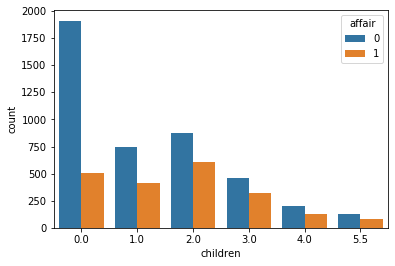

In [39]:
sns.countplot('children',hue='affair',data=dta)

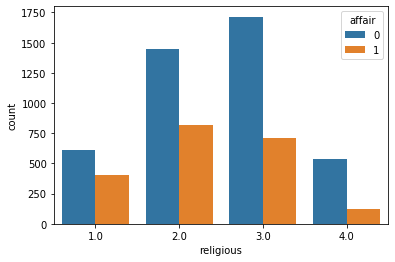

In [40]:
sns.countplot('religious',hue='affair',data=dta)

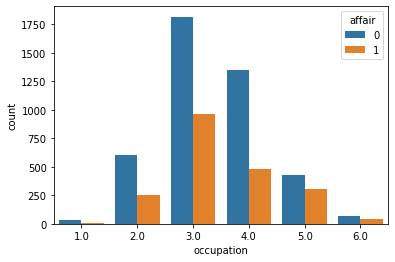

In [42]:
sns.countplot('occupation',hue='affair',data=dta)

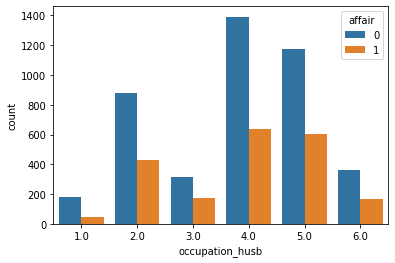

In [48]:
sns.countplot('occupation_husb',data=dta,hue='affair')

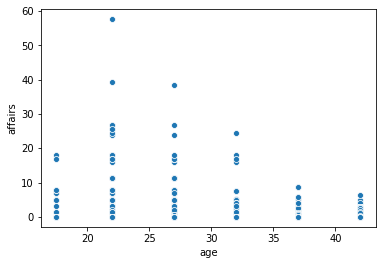

In [57]:
sns.scatterplot('age','affairs',data=dta)

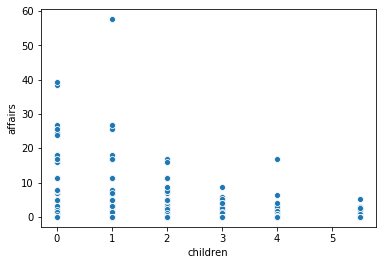

In [58]:
sns.scatterplot('children','affairs',data=dta)

In [60]:
X.head()

,occu_2,occu_3,occu_4,occu_5,occu_6,occu_husb_2,occu_husb_3,occu_husb_4,occu_husb_5,ocu_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [127]:
lr=LogisticRegression(solver='lbfgs',max_iter=10000)

In [128]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [129]:
cross_val_score(lr,x_train,y_train,cv=6,scoring='accuracy').mean() #mean accuracy of all folds

0.7246660011538896

In [130]:
y_scores=cross_val_predict(lr,x_train,y_train,cv=6,method='predict_proba')[:,1]

In [131]:
y_scores

array([0.07478176, 0.53970582, 0.44560308, ..., 0.4691025 , 0.11863723,
       0.19587305])

Plotting Roc curve

In [132]:
fpr,tpr,thresholds=roc_curve(y_train,y_scores)

Text(0, 0.5, 'True Positive Rate')

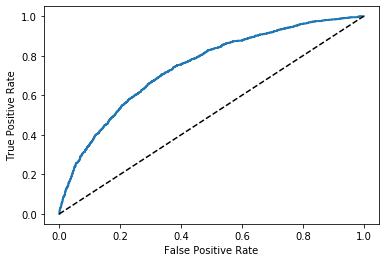

In [133]:
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [134]:
roc_auc_score(y_train,y_scores) # Calculating Area Under the curve of the above ROC curve

0.7435487391713302

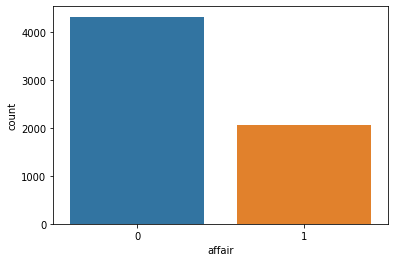

In [147]:
sns.countplot('affair',data=dta)

Since the dataset has less number of 1's as labels than 0's precision recall curve is a better metric than roc curve

In [135]:
precisions,recalls,thresholds=precision_recall_curve(y_train,y_scores)

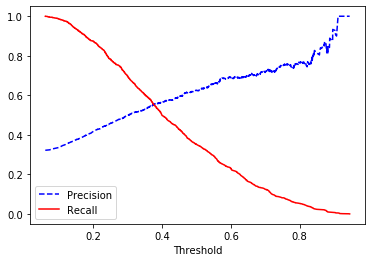

In [136]:
plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
plt.plot(thresholds,recalls[:-1],'r-',label='Recall')
plt.xlabel('Threshold')
plt.legend()

In [139]:
y_pred=cross_val_predict(lr,x_train,y_train,cv=6)

In [146]:
precision_score(y_train,y_pred)

0.6256800870511425